# DAV-5400
# Mark Kaplan
# Project 2 (M9)

## Part 1

A json file of the books was created, and then we use the json fetch method to obtain the file.

In [61]:
from urllib.request import Request, urlopen
import json
from IPython.display import display
import pandas as pd

request = Request('https://raw.githubusercontent.com/mark-kaplan-0/DAV-5400-data/main/books.json')
response = urlopen(request)
elevations = response.read()
data = json.loads(elevations)
df_data_json = pd.json_normalize(data['books'])
display(df_data_json)

,id,title,author,category,first publication year
0,01,Tanya,Alter Rebbe,Chassidus,1796
1,02,Shulchan Aruch,Alter Rebbe,Halacha,1814
2,03,Torah Ohr,Alter Rebbe and Tzemach Tzedek,Chassidus,1814


An html file was created and loaded using the pd.read method.

In [29]:
html_load = pd.read_html("https://raw.githubusercontent.com/mark-kaplan-0/DAV-5400-data/main/books.html")
df_html = pd.concat(html_load)
display(df_html)

,id,title,author,category,first publication year
0,1,Tanya,Alter Rebbe,Chassidus,1796
1,2,Shulchan Aruch,Alter Rebbe,Halacha,1814
2,3,Torah Ohr,Alter Rebbe and Tzemach Tzedek,Chassidus,1837


The two data frames are identical.


## Part 2

We download the data and parse it using BeautifulSoup and create a parsing expression.

In [38]:
from bs4 import BeautifulSoup

html = urlopen('https://www.yu.edu/katz/programs/graduate/artificial-intelligence/faculty')
bs = BeautifulSoup(html.read(), 'html.parser')

raw_text = bs.find_all('div', {'class':'body'})

Next we create a dataframe with the relevant column names

In [40]:
column_names = ['name','title','bio','teaching background']
faculty_info = pd.DataFrame(columns=column_names)

We use the get_text() function from BeautifulSoup to convert the raw_text into clean text.

In [44]:
# values are stored in a list
list_storage = []
for name in raw_text:
    list_storage.append(name.get_text())
    
# we convert the list ot a string
string_storage = test[0]

# the string is split on the paragraphs
split_string_par = [x.strip() for x in string_storage.split('\n')]

The tables are created and then put in the originial dataframe. 

In [50]:
name = []
title = []
bio = []
teaching_background = []

counter = 0
for i in range(0, len(test2)-1, 3):
  storage = [x.strip() for x in split_string_par[i].split(',')] # split at comma in order to obtain name and title
  name.append(storage[0])
  title.append(storage[1])
  bio.append(split_string_par[i+1])
  teaching_background.append(split_string_par[i+2])

faculty_info['name'] = name
faculty_info['title'] = title
faculty_info['bio'] = bio
faculty_info['teaching background'] = teaching_background

display(faculty_info)

,name,title,bio,teaching background
0,Paul Russo,Ph.D. Vice Provost and Dean,Recent research examines computational methods...,"Teaches graduate courses in Social Computing, ..."
1,Andy Catlin,Program Director,Data scientist and data system developer with ...,Teaches graduate courses in Analytics Programm...
2,Sergey Fogelson,Instructor,Data scientist and data product architect with...,Teaches graduate courses in Computational Stat...
3,Lawrence Fulton,Instructor,Health data scientist with expertise in machin...,"Teaches graduate courses in Data Analytics, Ma..."
4,Jeff Nieman,Instructor,Data scientist and project manager with expert...,Teaches graduate courses in Predictive Modelin...
5,David Sweet,Instructor,David Sweet is a quantitative trader and forme...,Teaches Predictive Analytics.


# Part 3

For this section I will be using the NYT api of the most popular articles on NYTimes.com. This request gives the most viewed articles in the past 30 days. We load the data and convert it into a dataframe. We display the shape and then the entire dataframe.

In [85]:
rqst=Request("https://api.nytimes.com/svc/mostpopular/v2/viewed/30.json?api-key=uAvPmFpqJ8Cib3spS0FIlKny7tM9vxGF")
rsp = urlopen(rqst)
elevations = rsp.read()
data = json.loads(elevations)

df = pd.json_normalize(data['results'])
print(df.shape)

(20, 22)


In [86]:
display(df)

,uri,url,id,asset_id,source,published_date,updated,section,subsection,nytdsection,adx_keywords,column,byline,type,title,abstract,des_facet,org_facet,per_facet,geo_facet,media,eta_id
0,nyt://article/2d7a5168-11c2-5168-aea3-96ac42a2...,https://www.nytimes.com/2021/10/21/us/alec-bal...,100000008037886,100000008037886,New York Times,2021-10-21,2021-11-10 18:56:39,U.S.,,u.s.,"Movies;Deaths (Fatalities);Firearms;Baldwin, A...",None,"By Simon Romero, Julia Jacobs and Glenn Thrush",Article,Alec Baldwin Was Told Gun in Fatal Shooting on...,The actor was told a gun being used as a prop ...,"[Movies, Deaths (Fatalities), Firearms]",[],"[Baldwin, Alec, Hutchins, Halyna (1979-2021), ...","[Santa Fe (NM), New Mexico]","[{'type': 'image', 'subtype': 'photo', 'captio...",0
1,nyt://article/6fcd3192-a2a6-5f41-90ea-bdfb76f6...,https://www.nytimes.com/2021/10/28/business/ge...,100000008034228,100000008034228,New York Times,2021-10-28,2021-11-10 18:37:08,Business,,business,Generation Z;Millennial Generation;Workplace E...,None,By Emma Goldberg,Article,The 37-Year-Olds Are Afraid of the 23-Year-Old...,Twenty-somethings rolling their eyes at the ha...,"[Generation Z, Millennial Generation, Workplac...",[],[],[],"[{'type': 'image', 'subtype': 'photo', 'captio...",0
2,nyt://article/3b2517e1-d504-52e3-aa21-993c5ae1...,https://www.nytimes.com/2021/10/18/us/politics...,100000006715368,100000006715368,New York Times,2021-10-18,2021-10-27 09:28:27,U.S.,Politics,u.s.,United States Defense and Military Forces;Iraq...,None,By Eric Schmitt,Article,"Colin Powell, Who Shaped U.S. National Securit...",A former chairman of the Joint Chiefs of Staff...,"[United States Defense and Military Forces, Ir...",[],"[Powell, Colin L, Bush, George W, Cheney, Dick]",[],"[{'type': 'image', 'subtype': 'photo', 'captio...",0
3,nyt://article/b86c1d51-59fc-5801-a536-e41b61d0...,https://www.nytimes.com/2021/10/17/us/riders-w...,100000008029013,100000008029013,New York Times,2021-10-17,2021-10-22 06:05:49,U.S.,,u.s.,"Sex Crimes;Railroad Accidents and Safety;Ngoy,...",None,By Eduardo Medina,Article,"As a Woman Was Raped, Train Riders Failed to I...",The SEPTA train car near Philadelphia had seve...,"[Sex Crimes, Railroad Accidents and Safety]",[Southeastern Pennsylvania Transportation Auth...,"[Ngoy, Fiston]","[Philadelphia (Pa), Upper Darby (Pa)]","[{'type': 'image', 'subtype': 'photo', 'captio...",0
4,nyt://interactive/cba553d7-2ebc-597f-bd74-de3f...,https://www.nytimes.com/interactive/2014/upsho...,100000002615736,100000002615736,New York Times,2013-12-21,2020-11-03 18:17:18,The Upshot,,the upshot,Language and Languages;English Language,None,By Josh Katz and Wilson Andrews,Interactive,"How Y’all, Youse and You Guys Talk",What does the way you speak say about where yo...,"[Language and Languages, English Language]",[],[],[],"[{'type': 'image', 'subtype': '', 'caption': '...",0
5,nyt://article/0a820161-3038-5e3e-9a14-5939a00d...,https://www.nytimes.com/2021/11/08/us/tiktok-h...,100000008066487,100000008066487,New York Times,2021-11-08,2021-11-10 09:36:48,U.S.,,u.s.,Missing Persons;Rescues;Social Media;Sign Lang...,None,By Daniel Victor and Eduardo Medina,Article,Missing Girl Is Rescued After Using Hand Signa...,The girl flashed the hand signal from a car on...,"[Missing Persons, Rescues, Social Media, Sign ...",[TikTok (ByteDance)],"[Brick, James Herbert]","[Kentucky, Asheville (NC)]","[{'type': 'image', 'subtype': 'photo', 'captio...",0
6,nyt://article/77311108-b000-5121-8b8b-5d1b7d88...,https://www.nytimes.com/2021/10/15/opinion/cov...,100000008023147,100000008023147,New York Times,2021-10-15,2021-10-16 12:26:01,Opinion,,opinion,Vaccination and Immunization;Coronavirus (2019...,None,By Zeynep Tufekci,Article,The Unvaccinated May Not Be Who You Think,"Science can find a cure for our diseases, but ...","[Vaccination and Immunization, Coronavirus (20...",[],[],[United States],"[{'type': 'image', 'subtype': 'photo', 'captio...",0
7,nyt://article/a717e92d-8181-5b5d-8389-1601dc77...,htt

We drop the sections that are not useful for the analysis

In [87]:
df1 = df[['section', 'subsection','nytdsection', 'adx_keywords', 'byline', 'title', 'abstract']]
display(df1)

,section,subsection,nytdsection,adx_keywords,byline,title,abstract
0,U.S.,,u.s.,"Movies;Deaths (Fatalities);Firearms;Baldwin, A...","By Simon Romero, Julia Jacobs and Glenn Thrush",Alec Baldwin Was Told Gun in Fatal Shooting on...,The actor was told a gun being used as a prop ...
1,Business,,business,Generation Z;Millennial Generation;Workplace E...,By Emma Goldberg,The 37-Year-Olds Are Afraid of the 23-Year-Old...,Twenty-somethings rolling their eyes at the ha...
2,U.S.,Politics,u.s.,United States Defense and Military Forces;Iraq...,By Eric Schmitt,"Colin Powell, Who Shaped U.S. National Securit...",A former chairman of the Joint Chiefs of Staff...
3,U.S.,,u.s.,"Sex Crimes;Railroad Accidents and Safety;Ngoy,...",By Eduardo Medina,"As a Woman Was Raped, Train Riders Failed to I...",The SEPTA train car near Philadelphia had seve...
4,The Upshot,,the upshot,Language and Languages;English Language,By Josh Katz and Wilson Andrews,"How Y’all, Youse and You Guys Talk",What does the way you speak say about where yo...
5,U.S.,,u.s.,Missing Persons;Rescues;Social Media;Sign Lang...,By Daniel Victor and Eduardo Medina,Missing Girl Is Rescued After Using Hand Signa...,The girl flashed the hand signal from a car on...
6,Opinion,,opinion,Vaccination and Immunization;Coronavirus (2019...,By Zeynep Tufekci,The Unvaccinated May Not Be Who You Think,"Science can find a cure for our diseases, but ..."
7,World,Australia,world,Missing Persons;Kidnapping and Hostages;Childr...,By Yan Zhuang,"‘My Name Is Cleo’: Girl, 4, Is Found 18 Days A...",Cleo Smith disappeared one night while camping...
8,U.S.,,u.s.,Astroworld Music Festival Stampede (2021);Rap ...,By J. David Goodman and Maria Jimenez Moya,‘No Way Out’: A Sudden Life-and-Death Struggle...,Eight people died at Travis Scott’s Astroworld...
9,U.S.,,u.s.,"Missing Persons;Deaths (Fatalities);Petito, Ga...",By Michael Levenson and Isabella Grullón Paz,Human Remains Found in Florida Park Were Brian...,Dental records confirmed that the human remain...


For a simple exploratory analysis, I am interested in seeing the distribution of the Most Popular Articles organized by section. This would provide information on what visitors to NYTimes.com are interested in reading. Unfortunately the api only provides 20 articles, which is too small of a sample size to make any real conclusions, other than confirming an obvious hypothesis that the U.S. section is the most popular.

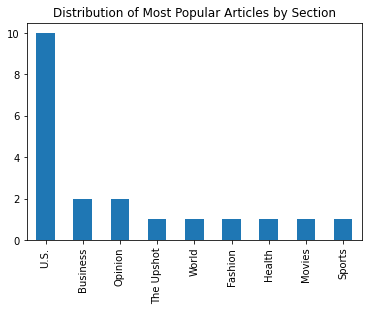

In [95]:
plot = df1.section.value_counts().plot(title='Distribution of Most Popular Articles by Section', kind='bar')